In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [104]:
def logreg(X,Y):
    param = np.size(xtrain,axis=1)
    X = X.T
    theta = np.random.rand(param,1) - 0.5
    print("Before: " + str(theta))
    learnrate = 0.015355
    maxiter = 100000
    for itr in range(0, maxiter):
        f = sigmoid(np.matmul(X.T,theta))
        df = f * (1-f)
        gradient = np.matmul( X, np.multiply(f-Y,df) )
        theta -= learnrate * gradient
    return (theta)

In [105]:
data = pd.read_csv("Admit.csv")
data['Ones'] = 1
print (data)

     admit  gre   gpa  rank  Ones
0        0  380  3.61     3     1
1        1  660  3.67     3     1
2        1  800  4.00     1     1
3        1  640  3.19     4     1
4        0  520  2.93     4     1
..     ...  ...   ...   ...   ...
395      0  620  4.00     2     1
396      0  560  3.04     3     1
397      0  460  2.63     2     1
398      0  700  3.65     2     1
399      0  600  3.89     3     1

[400 rows x 5 columns]


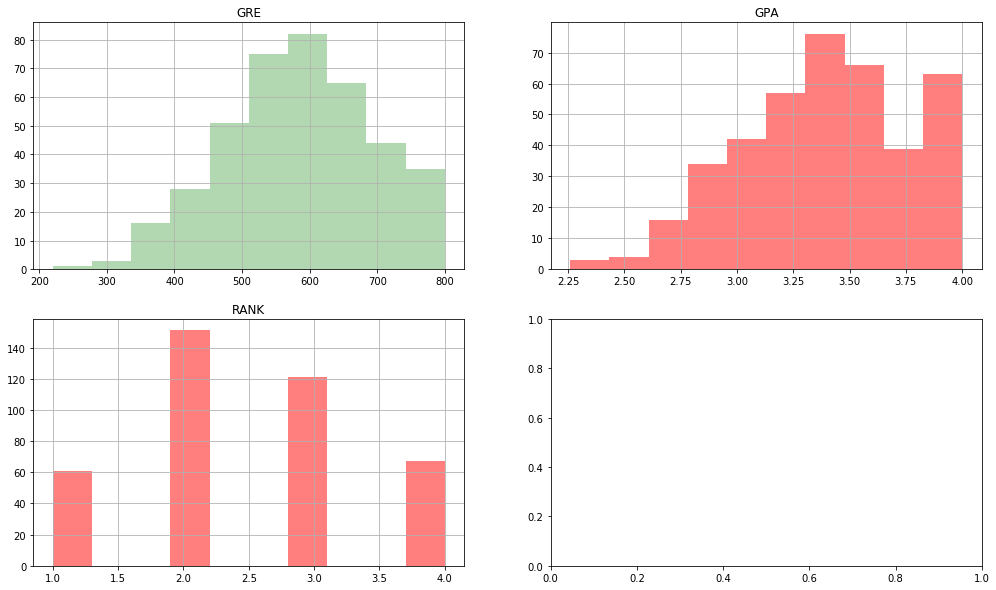

In [106]:
fig, ax_arr = plt.subplots(nrows=2, ncols=2, # let their scales be different
                       sharex=False, sharey=False)

fig.set_figwidth(17)
fig.set_figheight(10)

ax_arr[0][0].set_title('GRE')
freq_arr, binarr, _ = ax_arr[0][0].hist(data['gre'], facecolor='g', alpha=0.3)
ax_arr[0][0].grid()

ax_arr[0][1].set_title('GPA')
freq_arr, binarr, _ = ax_arr[0][1].hist(data['gpa'], facecolor='r', alpha=0.5)
ax_arr[0][1].grid()

ax_arr[1][0].set_title('RANK')
freq_arr, binarr, _ = ax_arr[1][0].hist(data['rank'], facecolor='r', alpha=0.5)
ax_arr[1][0].grid()

In [124]:
#Seperating All ones and zeros
mat = np.array(data[['admit','Ones','gre','gpa','rank']])
max = np.max(mat, axis=0)
mat = mat/max
one_mat = mat[mat[:,0] == 1]
zero_mat = mat[mat[:,0] == 0]

#Removing Biased Data As number of students not admitted are more than number of student admitted
#np.random.shuffle(zero_mat)
zero_mat = zero_mat[0:127,:]

#Seperating Testing and Training Data
perc = 0.8
train = one_mat[ 0: int( perc*np.size(one_mat,0) ) , :]
test = one_mat[ int( perc*np.size(one_mat,0) ): , :] 
train = np.append( train, zero_mat[ 0: int( perc*np.size(zero_mat,0) ) ,:], 0 )
test = np.append( test, zero_mat[ int( perc*np.size(zero_mat,0) ): , :], 0 )

np.random.shuffle(train)
np.random.shuffle(test)

xtrain = train[:, 1:np.size(train,1)]
ytrain = train[:, 0:1]
xtest = test[:, 1:np.size(test,1)]
ytest = test[:, 0:1]

In [125]:
theta = logreg(xtrain, ytrain)
print("After: " + str(theta))

Before: [[ 0.38082075]
 [-0.19454001]
 [-0.27807286]
 [ 0.07565773]]
After: [[-2.26224884]
 [ 2.10184135]
 [ 2.54454498]
 [-2.38563791]]


In [126]:
res = np.round( sigmoid( np.matmul(xtest, theta) ) )

In [127]:
error = (res - ytest)**2

In [128]:
no_of_matches = np.sum( res == ytest)
accuracy = no_of_matches/len(ytest)
#Accuracy Calculation
print (accuracy)

0.6923076923076923


Text(0, 0.5, 'ApplicationNumber')

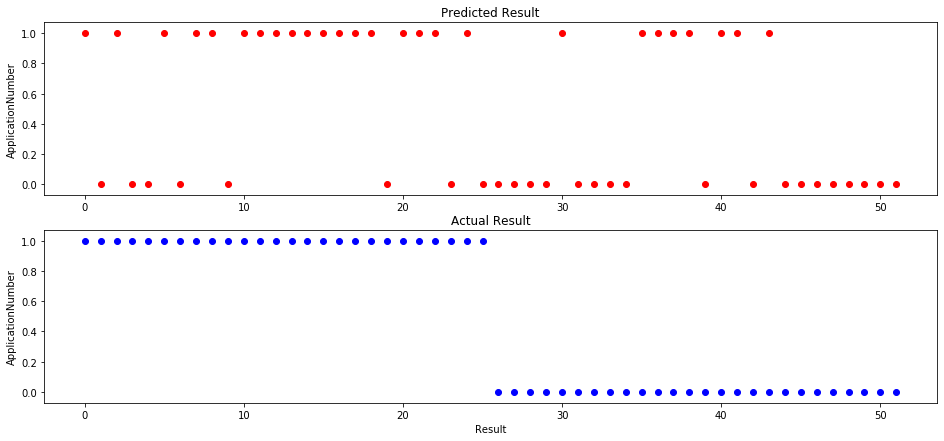

In [129]:
fig, arr = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(7)

arr[0].scatter (np.arange(len(res)),res,c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_ylabel('ApplicationNumber')

arr[1].scatter (np.arange(len(ytest)),ytest, c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('Result')
arr[1].set_ylabel('ApplicationNumber')